In [0]:
!pip install --upgrade pandas-profiling[notebook]

In [2]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# **Import EDA packages/tools**

* [Pandas](https://pandas.pydata.org/) for quick stuff
* [Seaborn](https://seaborn.pydata.org/) for quick and beautiful stuff (run on the surface of matplotlib)
* [Numpy](https://numpy.org/) for scientific computation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Global config of rcParams**

* [Matplotlib](https://matplotlib.org/) for fine-grained control<br>

**Note: Seaborn run on the surface of matplotlib.**




In [0]:
import matplotlib.pyplot as plt
from cycler import cycler
#Global params
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14



# **Load Datasets**

Load Dataset.

In [0]:
data = pd.read_csv('/drive/My Drive/Fusemachines Nepal/lnr/assignment/Car-Ads.csv')

In [6]:
data.head()

maker   model  ...                    date_last_seen  price_eur
0  seat    leon  ...  2016-01-07 00:56:35.766128+00:00    2500.30
1   NaN     NaN  ...  2016-01-18 19:02:24.218185+00:00    2980.24
2  audi     NaN  ...  2016-07-03 17:39:48.838084+00:00    8010.25
3  fiat   punto  ...  2016-01-02 10:02:05.676711+00:00    2300.26
4  opel  vectra  ...  2016-01-17 22:49:09.853789+00:00    2800.30

[5 rows x 16 columns]

## **interpretation**

* Total number of features are 16.
* Some feature are categorical and some are numerical.

# **Varaibel type identification**

## **What is variable type identification?**

Variable identification is to identify the different type of variables.
Here are some type of variables:

* Continious data(Example: 1,2,3.4..) they may be float,int
* Categorical data(Example: man,cat,ausi...) they may be string,character

## **Why variable type identification?**

The methods for handaling different variable systems are different so in first we need to identify the types of variables.

## **How to identify variable type?**
`data.info()` gives the variables types and many more.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                171819 non-null  object 
 1   model                137956 non-null  object 
 2   mileage              182252 non-null  float64
 3   manufacture_year     181223 non-null  float64
 4   engine_displacement  159210 non-null  float64
 5   engine_power         170868 non-null  float64
 6   body_type            136005 non-null  object 
 7   color_slug           12240 non-null   object 
 8   stk_year             102359 non-null  object 
 9   transmission         160413 non-null  object 
 10  door_count           164243 non-null  object 
 11  seat_count           156800 non-null  object 
 12  fuel_type            94681 non-null   object 
 13  date_created         200000 non-null  object 
 14  date_last_seen       200000 non-null  object 
 15  price_eur        

## **interpretation**

* Total number of variables are 16 
* There are two type of variables object and float
* 11 types are object 
* 4 types are float 
     

# **Descriptive statistics**

## **What is descriptative statistics?**

* A descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information.






## **Why descriptive statistics?**

* describe a data set are measures of central tendency and measures of variability or dispersion.

## **How to analyze descriptive analysis?**

Following are the different steps for analysis of descriptative ststistics.

## **Univariate analysis**

### **Continious variables**

### **What we are looking for?**

We are looking for some descriptive statistics.

* Central tendency(mean,median,mode)
* dispersion(S.D,Variance)
* Skwness
* IQR

### **Measure of central tendency**

#### **Mean**

In [8]:
data['mileage'].mean()

117620.00489432215

#### **Median**

In [9]:
data['mileage'].median()

89000.0

#### **Mode**

In [10]:
data['mileage'].mode()

0    0.0
dtype: float64

### **Measur of Dispersion**

#### **Standard Deviation**

In [11]:
data['mileage'].std()

342098.00622018025

#### **Variance**

In [12]:
data['mileage'].var()

117031045859.82248

### **Interquartile Range(IQR)**

In [13]:
from scipy.stats import iqr

iqr(data['mileage'])

nan

### **Skewness**

In [14]:
data['mileage'].skew()

19.166663975894597

### **Putting Everything togetger**

In [15]:
data.describe()

mileage  manufacture_year  ...   engine_power      price_eur
count  1.822520e+05     181223.000000  ...  170868.000000  200000.000000
mean   1.176200e+05       2002.016201  ...      95.529801   10367.046366
std    3.420980e+05         75.521064  ...      42.256414    9986.681152
min    0.000000e+00          0.000000  ...       3.000000     520.000000
25%    2.000000e+04       2004.000000  ...      68.000000    1480.007500
50%    8.900000e+04       2009.000000  ...      85.000000    7400.000000
75%    1.598000e+05       2013.000000  ...     110.000000   15908.850000
max    9.999999e+06       2017.000000  ...     997.000000   49922.540000

[8 rows x 5 columns]

### **What we found ?(interpretation)**
1.Mean,median and mode of the each feature.

2.variance,Standare deviation,IQR:<br>
    
 High standard  deviation: High standard deviation affected by outliers(i.e extreamly low or extreamly high numbers in data). That's because the standard deviation is based on the distance from mean.<br>

Low standard deviation: Low standard deviation means less effect of outlier.


Zero standard deviation: Same number repeat in datasets.

From above mileage is affected by outliers.

3.Skewness:<br>

Highly skewed distributation:  if skew value is less then -1 or greater than +1 .

Moderately skewed distributation: if the skew value is between -1 and +1.

Approximately symmetric distributation: if skew value is between -1/2 and +1/2.

From above mileage is positive skewed.






In [16]:
data.describe(include='all')

maker    model  ...                    date_last_seen      price_eur
count   171819   137956  ...                            200000  200000.000000
unique      44      842  ...                            190739            NaN
top      skoda  octavia  ...  2016-01-27 20:40:15.463610+00:00            NaN
freq     18006     7560  ...                              9262            NaN
mean       NaN      NaN  ...                               NaN   10367.046366
std        NaN      NaN  ...                               NaN    9986.681152
min        NaN      NaN  ...                               NaN     520.000000
25%        NaN      NaN  ...                               NaN    1480.007500
50%        NaN      NaN  ...                               NaN    7400.000000
75%        NaN      NaN  ...                               NaN   15908.850000
max        NaN      NaN  ...                               NaN   49922.540000

[11 rows x 16 columns]

## **Plotting univariate distributions**

`sns.distplot()` help to plot the distributation of variables.

* you can analysis one by one of every continious variables from datasets.

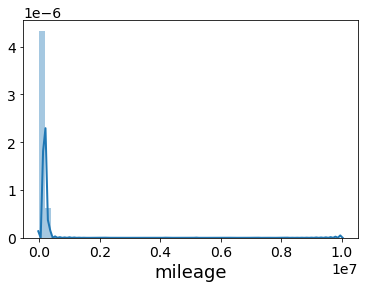

In [17]:
sns.distplot(data['mileage'])

### **What we found ?(interpretation)**

* Nearly 0.001 * 1e7 is the center(mean,median,mode) of the mileage.
* Above diagram shows mileage is nearly in normal distributation. 

* Highly positive skewed.

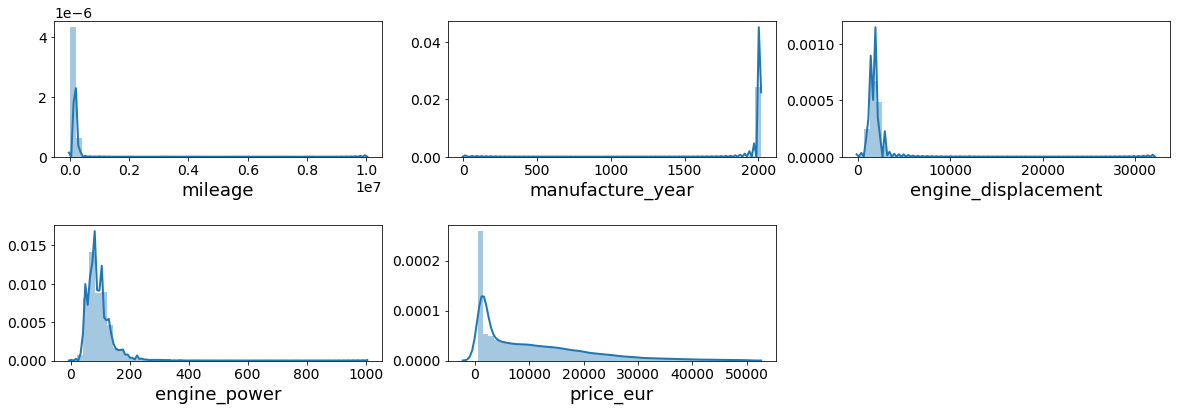

In [18]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
plt.subplot(3,3,1)
sns.distplot(data['mileage'])
plt.subplot(3,3,2)
sns.distplot(data['manufacture_year'])
plt.subplot(3,3,3)
sns.distplot(data['engine_displacement'])
plt.subplot(3,3,4)
sns.distplot(data['engine_power'])
plt.subplot(3,3,5)
sns.distplot(data['price_eur'])

### **What we found ?(interpretation)**

* Mileage, engine_displacement, engine_power, price_eur  are right(positive) skewed.
* Manufacture_year is left(negative) skewed.

### **Violinplot**

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

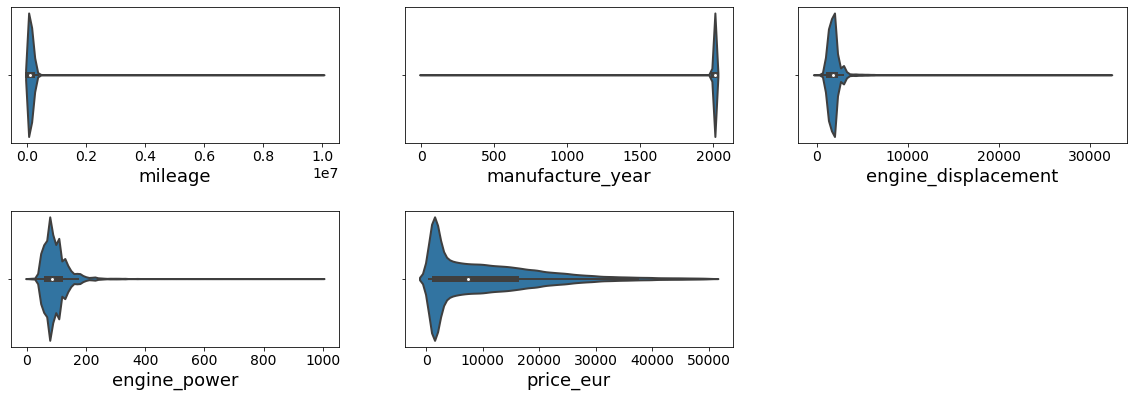

In [19]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
plt.subplot(3,3,1)
sns.violinplot(data['mileage'])
plt.subplot(3,3,2)
sns.violinplot(data['manufacture_year'])
plt.subplot(3,3,3)
sns.violinplot(data['engine_displacement'])
plt.subplot(3,3,4)
sns.violinplot(data['engine_power'])
plt.subplot(3,3,5)
sns.violinplot(data['price_eur'])

### **What we found ?(interpretation)**

* Mileage, engine_displacement, engine_power, price_eur  are right(positive) skewed.
* Manufacture_year is left(negative) skewed.

## **categorical features**

**Note: IN categorial feature we can mostly analyze freaquency of categorical variable which help to find out:**

* Imbalance data handling.
* There is no mean,median in categorical feature.
* There is mode in categorical variables.
* There is no dispersion in categorical variables.

### **Mode**

In [20]:
data['maker'].mode()

0    skoda
dtype: object

In [21]:
data['maker'].value_counts()

skoda            18006
volkswagen       17147
bmw              14964
mercedes-benz    13866
audi             13802
ford             13684
opel             12491
fiat              7383
citroen           7141
renault           6194
peugeot           5380
hyundai           4656
seat              4310
toyota            4138
nissan            4093
kia               2894
mazda             2708
volvo             2662
mini              2015
smart             2008
suzuki            1825
mitsubishi        1643
honda             1470
chevrolet         1181
rover             1051
jeep               926
lancia             783
porsche            647
subaru             571
chrysler           534
jaguar             500
alfa-romeo         269
dodge              257
lexus              202
dacia              117
land-rover          87
isuzu               71
maserati            39
hummer              30
infinity            28
bentley             23
lotus               18
rolls-royce          3
lamborghini

#### **Histogram**

Histogram base on frequency.

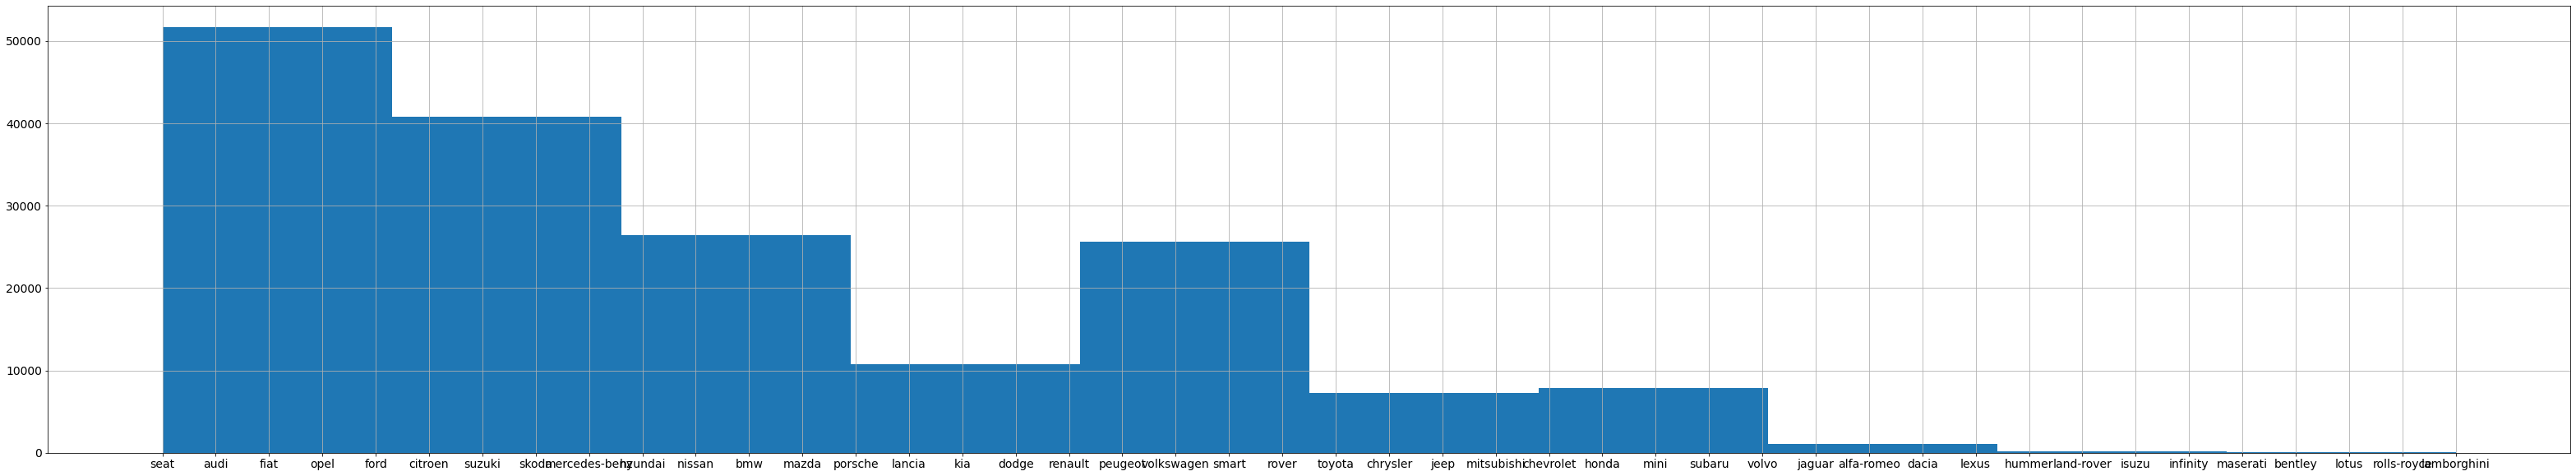

In [22]:
plt.figure(figsize=(55,10))
data.maker.hist()

### **What we found ?(interpretation)**

* Frequency of the categorical variable.
Seat have high frequency then other.

## **Bivariates(only 2 variables)**

**Note: In bivariate analysis we analyze the relationship between the variables.**

* Correlation
* Regression

### **Plotting bivariate distributions or scatter plot**



### **Continious variables**

### **Joint plot**

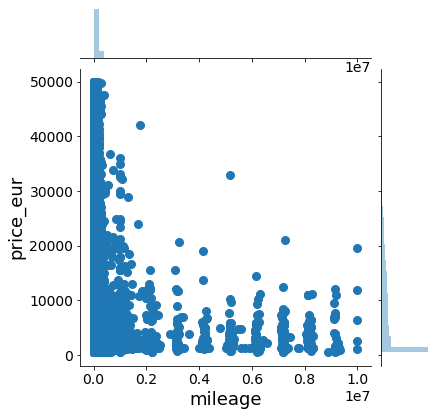

In [23]:
columns = pd.DataFrame(data, columns=["mileage", "price_eur"])
sns.jointplot(x="mileage", y="price_eur", data=columns)# inted of jointplot you can use scatterplot

### **What we found ?(interpretation)**

* Less mileage have hight price. Continously increasing mileage. price of car is decreasing. There might be relationship between price and mileage.

### **Categorical and continious variables**

### **Categorical plot**

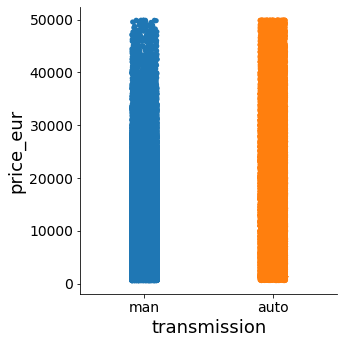

In [24]:
catcolumns=pd.DataFrame(data, columns=["transmission","price_eur"])
plt.rcParams['figure.figsize'] = 55,15
sns.catplot(x="transmission", y="price_eur", data=catcolumns)

### **What we found ?(interpretation)**

* Auto have greater population and price then man. This means auto highlt price is highly affected by auto.

### **Box-plot**

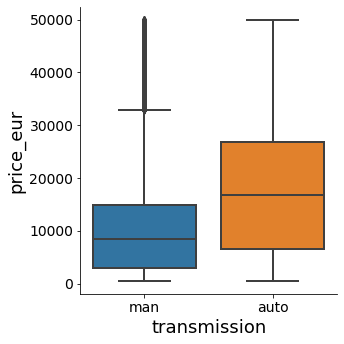

In [25]:
sns.catplot(x="transmission", y="price_eur", kind="box", data=catcolumns)

### **What we found ?(interpretation)**

* Man has hight outlier respect to price_eur.

### **Violin plot**

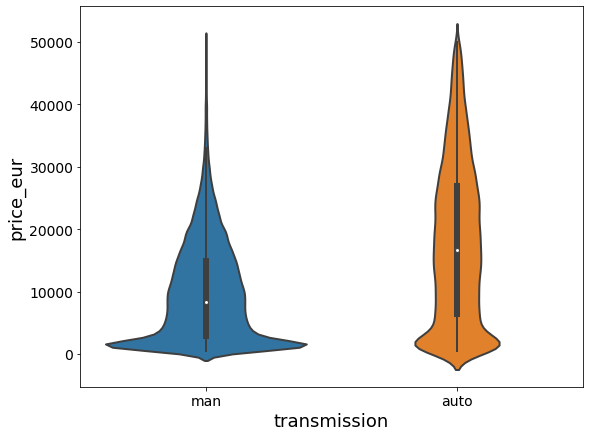

In [26]:
fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax,x=data['transmission'],y = data["price_eur"] ) 

### Note: categorical vs categorical plot is slightly difficult to plot, Because there is  no numeric reference.

## **Multivariate analysis**

### **Continious variables**

* Multivariate plot of float variables.

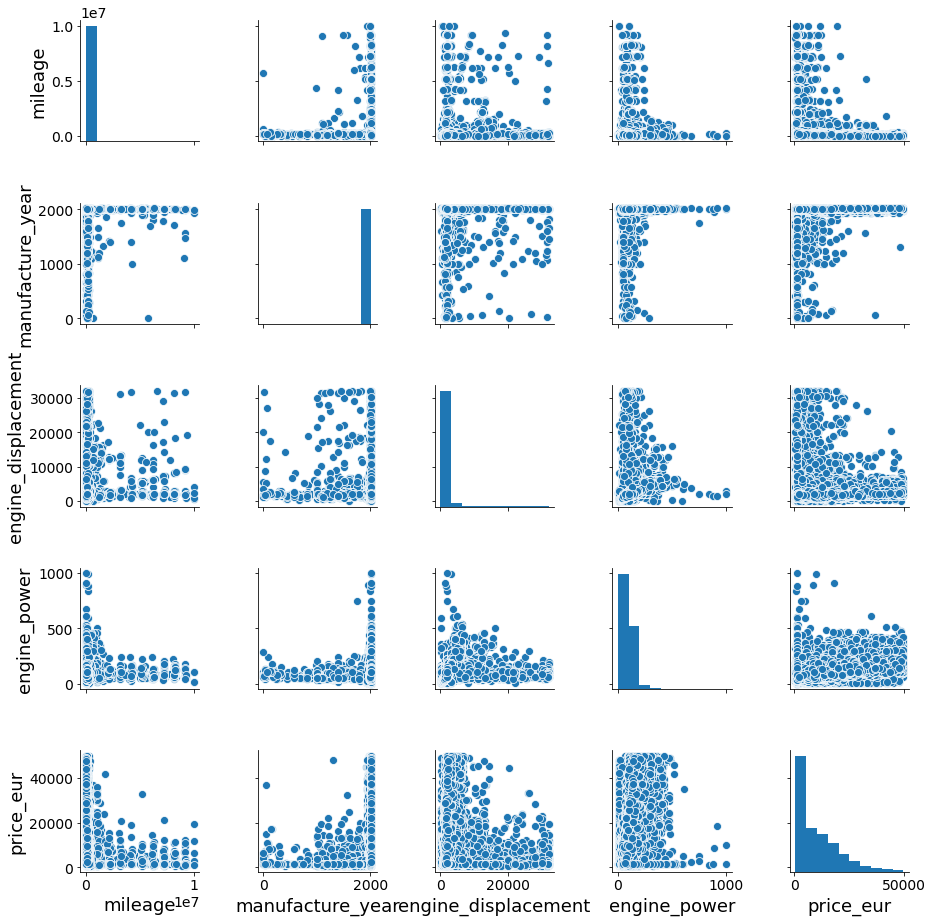

In [27]:
sns.pairplot(data)

# **Pandas Profiling**

All above  steps are done by pandas profiling.

In [0]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [29]:
profile

We interpretate lots of thing from the pandas profiling.

# **Missing Values**

## **Missing value identification**

In [30]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(16)

Total     %
color_slug           187760  93.9
fuel_type            105319  52.7
stk_year              97641  48.8
body_type             63995  32.0
model                 62044  31.0
seat_count            43200  21.6
engine_displacement   40790  20.4
transmission          39587  19.8
door_count            35757  17.9
engine_power          29132  14.6
maker                 28181  14.1
manufacture_year      18777   9.4
mileage               17748   8.9
price_eur                 0   0.0
date_last_seen            0   0.0
date_created              0   0.0

From above we  say that Color slug have 93.9 % data missing ,fuel_type 52.7 %,stk_year 48.8%, body_type 32% and model 31%.

Theoretically, 25 to 30% is the maximum missing values are allowed. 
So, we can delete this features from dataset.

## **Missing value treatment**

Here is lack of domain expert, so we can view the prespective of data, So we can delete missing value greater then 25% to 30% missing value.

### **Drop highly missing features**

In [0]:
data = data.drop(['color_slug','fuel_type','stk_year','body_type','model'],axis=1)

In [32]:
data.head()

maker   mileage  ...                    date_last_seen  price_eur
0  seat  178000.0  ...  2016-01-07 00:56:35.766128+00:00    2500.30
1   NaN  135000.0  ...  2016-01-18 19:02:24.218185+00:00    2980.24
2  audi  138000.0  ...  2016-07-03 17:39:48.838084+00:00    8010.25
3  fiat  105000.0  ...  2016-01-02 10:02:05.676711+00:00    2300.26
4  opel  129385.0  ...  2016-01-17 22:49:09.853789+00:00    2800.30

[5 rows x 11 columns]

After removing high missing value features.

In [33]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

Total     %
seat_count           43200  21.6
engine_displacement  40790  20.4
transmission         39587  19.8
door_count           35757  17.9
engine_power         29132  14.6
maker                28181  14.1
manufacture_year     18777   9.4
mileage              17748   8.9
price_eur                0   0.0
date_last_seen           0   0.0
date_created             0   0.0

## **Numerical datatype imputation**

Here we fill Nan values by mean of there feature.

### **Why we impute by numerical value?**

* Mean imputation reduces the variance of the imputed variables.
* Mean imputation does not preserve relationships between variables such as correlations.

In [34]:
#seat imputation
data['seat_count'].replace('None', np.nan, inplace=True)
data['seat_count'] = pd.to_numeric(data['seat_count'])
data['seat_count']=data['seat_count'].fillna(data['seat_count'].mean())

#engine displacment
data['engine_displacement'].replace('None', np.nan, inplace=True)
data['engine_displacement'] = pd.to_numeric(data['engine_displacement'])
data['engine_displacement']=data['engine_displacement'].fillna(data['engine_displacement'].mean())

# transmission imputation (string)
#door count imputation
data['door_count'].replace('None', np.nan, inplace=True)
data['door_count'] = pd.to_numeric(data['door_count'])
data['door_count']=data['door_count'].fillna(data['door_count'].mean())

#engine  power
data['engine_power'].replace('None', np.nan, inplace=True)
data['engine_power'] = pd.to_numeric(data['engine_power'])
data['engine_power']=data['engine_power'].fillna(data['engine_power'].mean())

#maker (string)
#manufacture
data['manufacture_year'].replace('None', np.nan, inplace=True)
data['manufacture_year'] = pd.to_numeric(data['manufacture_year'])
data['manufacture_year']=data['manufacture_year'].fillna(data['manufacture_year'].mean())

#mileage
data['mileage'].replace('None', np.nan, inplace=True)
data['mileage'] = pd.to_numeric(data['mileage'])
data['mileage']=data['mileage'].fillna(data['mileage'].mean())


total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)


Total     %
transmission         39587  19.8
maker                28181  14.1
price_eur                0   0.0
date_last_seen           0   0.0
date_created             0   0.0
seat_count               0   0.0
door_count               0   0.0
engine_power             0   0.0
engine_displacement      0   0.0
manufacture_year         0   0.0
mileage                  0   0.0

## **Categorical datatype imputation**



In [35]:
print('Number of  unique variabels in transmission:',len(data['transmission'].unique()))
print('Number of unique variables in maker:',len(data['maker'].unique()))

Number of  unique variabels in transmission: 3
Number of unique variables in maker: 45


From above, 'maker' have 45 categorical variables,  if we did encoding of 'maker' it will make complex by increasing the number of variables.

In [0]:
data = data.drop(['maker'],axis=1)

Fill categorical value by maximun number of repetating value.

In [37]:
data['transmission'] = data['transmission'].fillna(data['transmission'].value_counts().index[0])
data.head()

mileage  manufacture_year  ...                    date_last_seen  price_eur
0  178000.0            2000.0  ...  2016-01-07 00:56:35.766128+00:00    2500.30
1  135000.0            2007.0  ...  2016-01-18 19:02:24.218185+00:00    2980.24
2  138000.0            2005.0  ...  2016-07-03 17:39:48.838084+00:00    8010.25
3  105000.0            2009.0  ...  2016-01-02 10:02:05.676711+00:00    2300.26
4  129385.0            2003.0  ...  2016-01-17 22:49:09.853789+00:00    2800.30

[5 rows x 10 columns]

In [38]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

Total    %
price_eur                0  0.0
date_last_seen           0  0.0
date_created             0  0.0
seat_count               0  0.0
door_count               0  0.0
transmission             0  0.0
engine_power             0  0.0
engine_displacement      0  0.0
manufacture_year         0  0.0
mileage                  0  0.0

# **Feature transformation**

Machine learning algorithm value take numerical value. We convert all categorical value into numerical.

One hot encoding for transmission feature.

In [39]:
data['transmission'].unique()

array(['man', 'auto'], dtype=object)

In [0]:
pd.get_dummies(data['transmission'],prefix=['man', 'auto'])
dummies = pd.get_dummies(data['transmission'])
data=data.join(dummies)
data = data.drop(['transmission'],axis=1)

## **Row filter**
From Policy : policy was to remove all ads older than 60 days.

First we calculate the different between the data_created and date last seen.



In [41]:
created = data['date_created'].apply(lambda x: x[:10])
last_seen = data['date_last_seen'].apply(lambda x: x[:10])
created = pd.to_datetime(created)
last_seen = pd.to_datetime(last_seen)
diff_col = last_seen - created
data['diff_data']=diff_col
data.head()

mileage  manufacture_year  engine_displacement  ...  auto  man  diff_data
0  178000.0            2000.0          1390.000000  ...     0    1     4 days
1  135000.0            2007.0          1149.000000  ...     0    1    41 days
2  138000.0            2005.0          1984.000000  ...     0    1   120 days
3  105000.0            2009.0          2007.140889  ...     0    1    21 days
4  129385.0            2003.0          2007.140889  ...     0    1    16 days

[5 rows x 12 columns]

Here we can say that there is no role of date_created  and data_last_seen in price_eur.

In [0]:
data['diff_data']=data.diff_data.apply(lambda x: x.days)


In [43]:
data.head()

mileage  manufacture_year  engine_displacement  ...  auto  man  diff_data
0  178000.0            2000.0          1390.000000  ...     0    1          4
1  135000.0            2007.0          1149.000000  ...     0    1         41
2  138000.0            2005.0          1984.000000  ...     0    1        120
3  105000.0            2009.0          2007.140889  ...     0    1         21
4  129385.0            2003.0          2007.140889  ...     0    1         16

[5 rows x 12 columns]

In [0]:
data=data[data.diff_data <60]

In [45]:
data.head()

mileage  manufacture_year  engine_displacement  ...  auto  man  diff_data
0  178000.000000            2000.0          1390.000000  ...     0    1          4
1  135000.000000            2007.0          1149.000000  ...     0    1         41
3  105000.000000            2009.0          2007.140889  ...     0    1         21
4  129385.000000            2003.0          2007.140889  ...     0    1         16
8  117620.004894            2011.0          1400.000000  ...     0    1          3

[5 rows x 12 columns]

Now remove unnessecary features.

In [0]:
data = data.drop(['date_created','date_last_seen','diff_data'],axis=1)

In [47]:
data.head()

mileage  manufacture_year  engine_displacement  ...  price_eur  auto  man
0  178000.000000            2000.0          1390.000000  ...    2500.30     0    1
1  135000.000000            2007.0          1149.000000  ...    2980.24     0    1
3  105000.000000            2009.0          2007.140889  ...    2300.26     0    1
4  129385.000000            2003.0          2007.140889  ...    2800.30     0    1
8  117620.004894            2011.0          1400.000000  ...    7253.89     0    1

[5 rows x 9 columns]

# **Outlier**

## **Outlier detection**

### **Box plot**

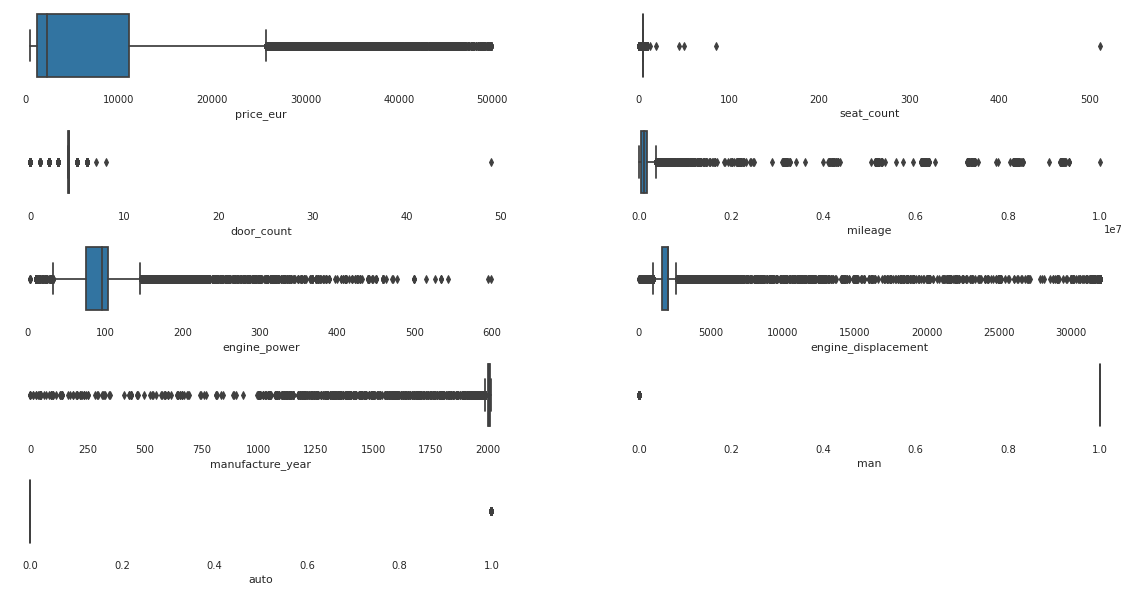

In [48]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5,wspace=0.2)
plt.subplot(5,2,1)
sns.boxplot(data['price_eur'])
plt.subplot(5,2,2)
sns.boxplot(data['seat_count'])
plt.subplot(5,2,3)
sns.boxplot(data['door_count'])
plt.subplot(5,2,4)
sns.boxplot(data['mileage'])
plt.subplot(5,2,5)
sns.boxplot(data['engine_power'])
plt.subplot(5,2,6)
sns.boxplot(data['engine_displacement'])
plt.subplot(5,2,7)
sns.boxplot(data['manufacture_year'])
plt.subplot(5,2,8)
sns.boxplot(data['man'])
plt.subplot(5,2,9)
sns.boxplot(data['auto'])


### **What we found ?(interpretation)**

* Seat count,door_count, engine_displacement,manufacture_year have lots of outlier.

### **Z_score**

In [49]:
from scipy import stats

z=np.abs(stats.zscore(data))
print(z)

[[0.11298623 0.02488929 0.35817373 ... 0.54241659 0.47400679 0.47400679]
 [0.00344564 0.1006853  0.47985137 ... 0.48859129 0.47400679 0.47400679]
 [0.08467717 0.1223413  0.04658763 ... 0.5648511  0.47400679 0.47400679]
 ...
 [0.38917346 0.00759472 0.04658763 ... 0.67712566 0.47400679 0.47400679]
 [0.03717013 0.0898573  0.04658763 ... 0.56592662 0.47400679 0.47400679]
 [0.35519715 0.18730931 0.3556493  ... 2.42837274 2.1096744  2.1096744 ]]


Let’s try and define a threshold to identify an outlier.

In [50]:
threshold = 3
print(np.where(z > 3))

(array([   14,    33,    43, ..., 87780, 87808, 87814]), array([0, 6, 0, ..., 6, 3, 6]))


### **What we found ?(interpretation)**

* The first array contains the list of row numbers and second array respective column numbers.

In [51]:
print(z[55][1])

0.04654529058156333


## **IQR**

In [52]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

mileage                127134.000000
manufacture_year            9.983799
engine_displacement       409.140889
engine_power               28.000000
door_count                  0.066191
seat_count                  0.120513
price_eur                9807.550000
auto                        0.000000
man                         0.000000
dtype: float64


## **Outlier treatment**

### **Z-score**

In [0]:
data= data[(z < 3).all(axis=1)]

### **IQR**

In [54]:
data=data[~((data< (Q1 - 1.5 * IQR)) |(data> (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(42479, 9)

## **Feature Selection**

In [55]:
data.corr()

mileage  manufacture_year  ...  auto  man
mileage              1.000000         -0.522331  ...   NaN  NaN
manufacture_year    -0.522331          1.000000  ...   NaN  NaN
engine_displacement  0.267313         -0.230640  ...   NaN  NaN
engine_power         0.085623         -0.004632  ...   NaN  NaN
door_count           0.179605         -0.285834  ...   NaN  NaN
seat_count          -0.217160          0.338188  ...   NaN  NaN
price_eur           -0.579468          0.628669  ...   NaN  NaN
auto                      NaN               NaN  ...   NaN  NaN
man                       NaN               NaN  ...   NaN  NaN

[9 rows x 9 columns]